**AI ML SMARTBRIDGE - GOOGLE EXTERNSHIP 2023**\
**NINAD NILESH SUGANDHI**\
**ASSIGNMENT 5 - MARKET BASKET MAGIC: EXTRACTING INSIGHTS FOR RETAIL SUCCESS**

1. [Problem Statement](#problem_statement)
2. [Importing Libraries](#importing_libraries)
3. [Loading Data](#loading_data) 💎
4. [Data Preprocessing and understanding](#data_preprocessing)
5. [Data Visualization](#data_visualization) ⚙️\
    5.1. [Univariate Analysis](#univariate)\
    5.2. [Bi- Variate Analysis](#bivariate)\
    5.3. [Multi-Variate Analysis](#multivariate)
6. [Finding outliers and replacing them](#outliers)
7. [Checking correlation of independent variables with target](#checking-correlation)
8. [Checking for categorical columns and performing encoding](#encoding)
9. [Standardize the features by scaling the data](#scaling)
10. [Clustering models](#clustering)\
    10.1. [K Means Clustering](#kmeans)\
    10.2. [Heirarchical Clustering](#heirarchical)\
    10.3. [DBSCAN Clustering](#dbscan)
11. [Evaluation of models](#evaluate)
12. [Plotting](#plotting)\
    12.1. [Clustering results](#results)\
    12.2. [Number of clusters vs Inertia plot](#2dplot)

<a id="problem_statement"></a>
**Problem Statement:**\
Customer segmentation is a crucial aspect of retail and marketing strategy. Mall 
Customer Segmentation is a common data analysis project that involves categorizing 
mall customers into distinct groups or segments based on various characteristics and 
behaviors. This segmentation is valuable for tailoring marketing efforts, optimizing 
store layouts, and enhancing customer experiences.

<a id="importing_libraries"></a>
**Importing necessary libraries**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')           #ignoring warnings

**Dataset link: <a href = "https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data">Here</a>**

<a id="loading_data"></a>
**Loading and displaying data**

In [88]:
data = pd.read_csv("D:\\NINAD SUGANDHI\\SMARTBRIDGE\\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<a id="data_preprocessing"></a>
**Data Preprocessing and Understanding**

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
data.shape

(200, 5)

In [8]:
data.size

1000

In [9]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
data.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
data.duplicated

<bound method DataFrame.duplicated of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [16]:
data.empty

False

In [17]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [18]:
description = data.describe().T.style.background_gradient(
    cmap='viridis',  # colormap
    low=0, high=1,   # range of colors for the gradient
    axis=None        # gradient across the entire DataFrame
)

# styling attributes
styled_description = description.set_properties(**{'font-size': '10pt', 'text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')

styled_description

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [19]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [91]:
data.columns = ['customerid', 'gender', 'age', 'annual_income', 'spending_score']
data.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [92]:
data.head(10)

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<a id="data_visualization"></a>
**Performing Visualizations**

<a id="univariate"></a>
**Univariate Analysis**

<Axes: >

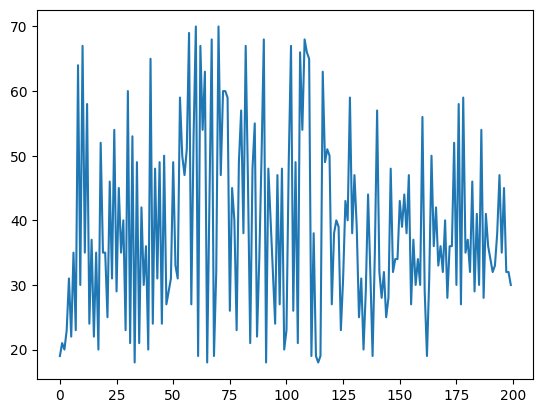

In [22]:
data.age.plot()

<Axes: >

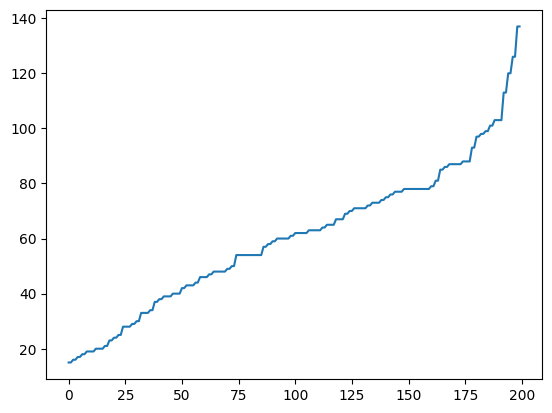

In [23]:
data.annual_income.plot()

<Axes: >

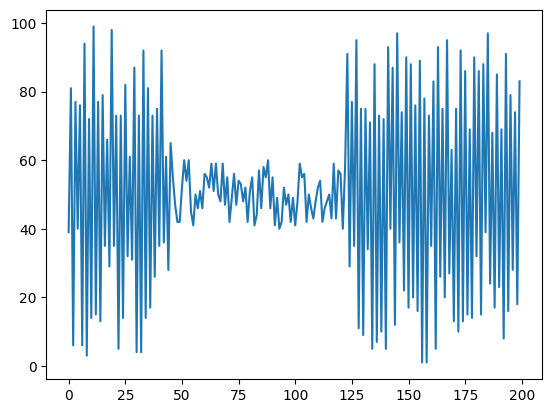

In [24]:
data.spending_score.plot()

<Axes: xlabel='age', ylabel='Density'>

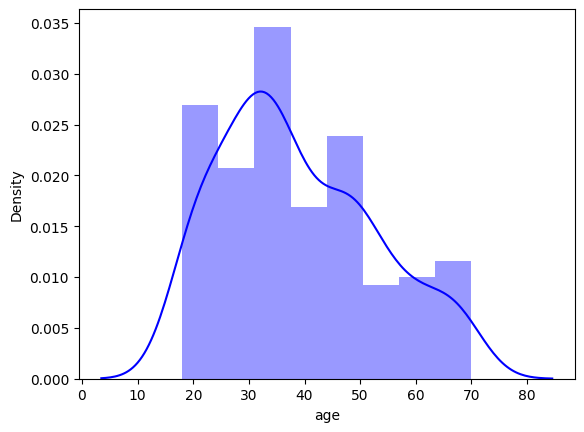

In [28]:
sns.distplot(data.age, color = 'blue')

<Axes: xlabel='annual_income', ylabel='Density'>

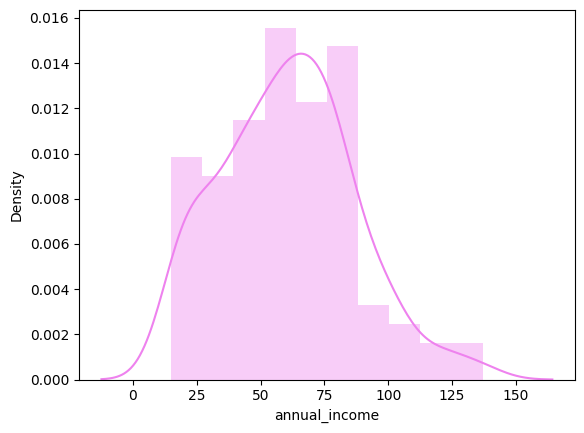

In [30]:
sns.distplot(data.annual_income, color = 'violet')

<Axes: xlabel='spending_score', ylabel='Density'>

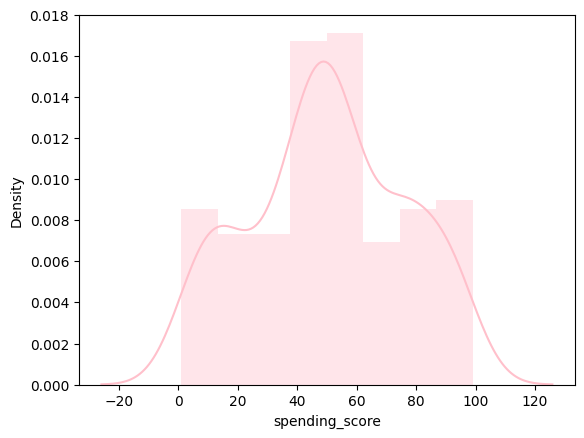

In [31]:
sns.distplot(data.spending_score, color = 'pink')

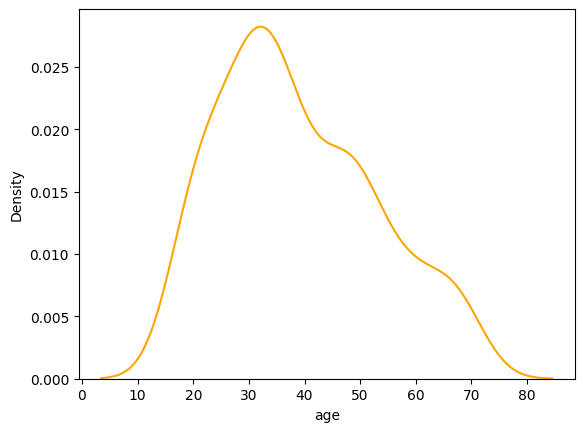

In [32]:
sns.kdeplot(data=data, x="age", color="orange")
plt.show()

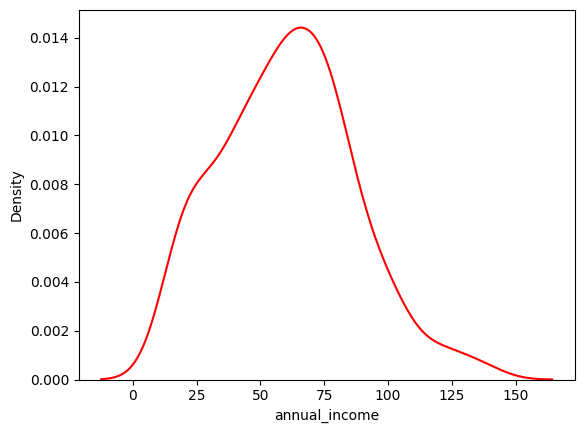

In [34]:
sns.kdeplot(data=data, x="annual_income", color="red")
plt.show()

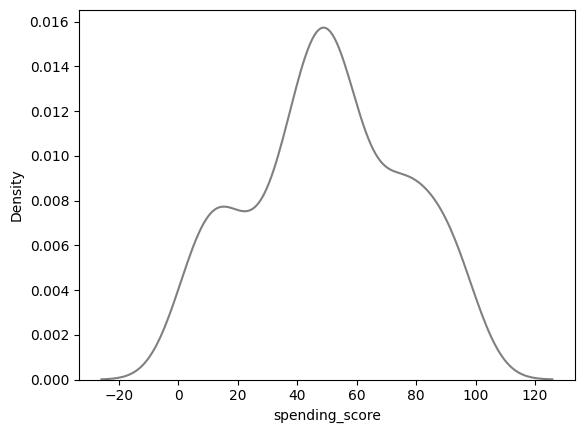

In [35]:
sns.kdeplot(data=data, x="spending_score", color="gray")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

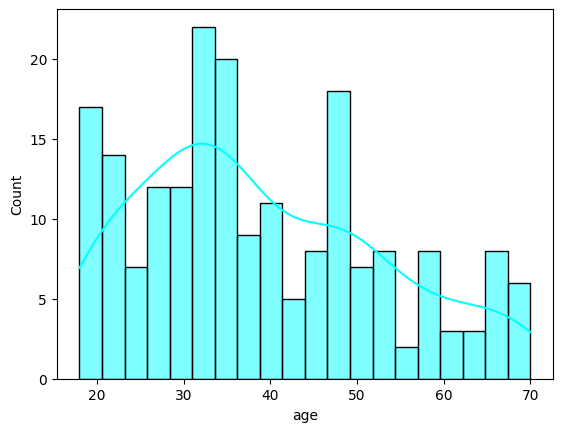

In [37]:
sns.histplot(data=data, x='age', bins=20, kde=True, color="cyan")

<Axes: xlabel='annual_income', ylabel='Count'>

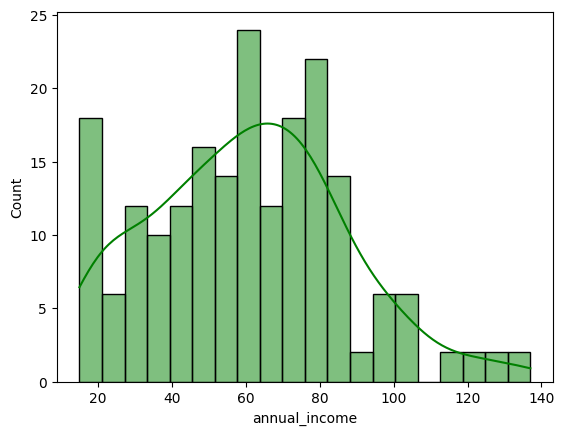

In [38]:
sns.histplot(data=data, x='annual_income', bins=20, kde=True, color="green")

<Axes: xlabel='spending_score', ylabel='Count'>

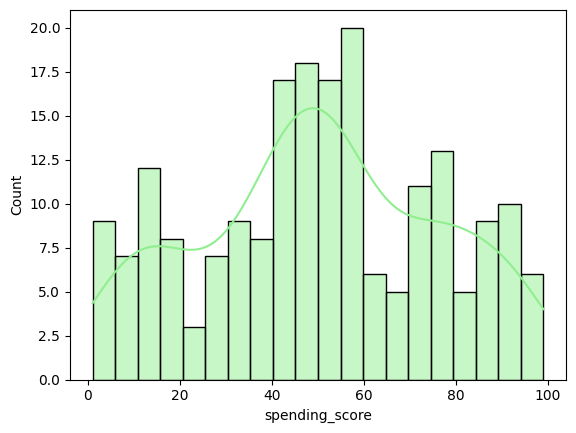

In [39]:
sns.histplot(data=data, x='spending_score', bins=20, kde=True, color="lightgreen")

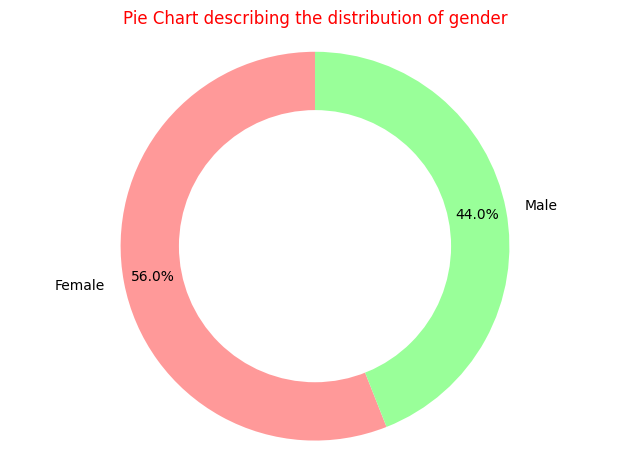

In [44]:
colors = ['#ff9999', '#99ff99']
explode = (0,0)

fig1, ax1 = plt.subplots()

species_counts = data['gender'].value_counts()

plt.pie(species_counts, colors = colors, labels=species_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.title("Pie Chart describing the distribution of gender", color = "red")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

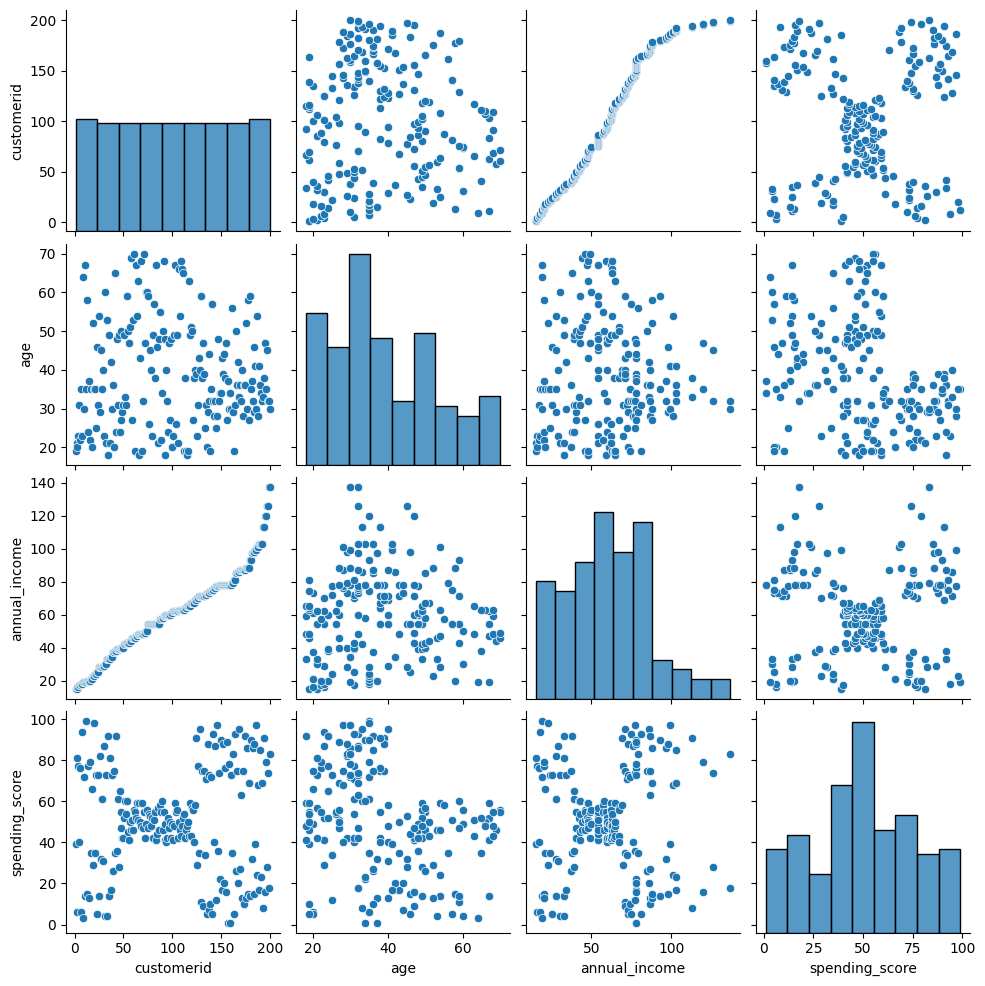

In [45]:
sns.pairplot(data)

<a id="bivariate"></a>
**Bivariate Analysis**

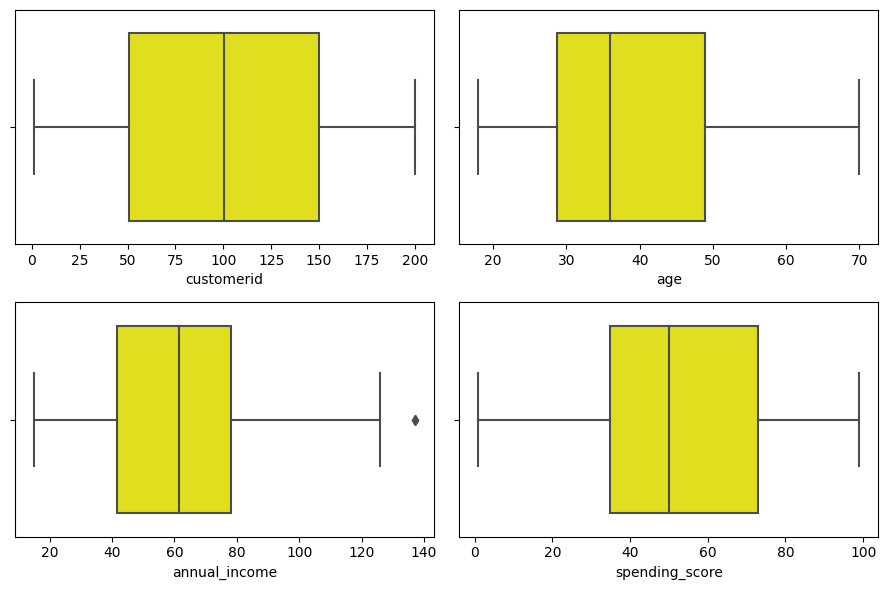

In [47]:
columns = ['customerid', 'age', 'annual_income', 'spending_score']

plt.figure(figsize=(9, 6))

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x=column, orient='vertical', color='yellow')

plt.tight_layout()

plt.show()

<Axes: xlabel='count', ylabel='gender'>

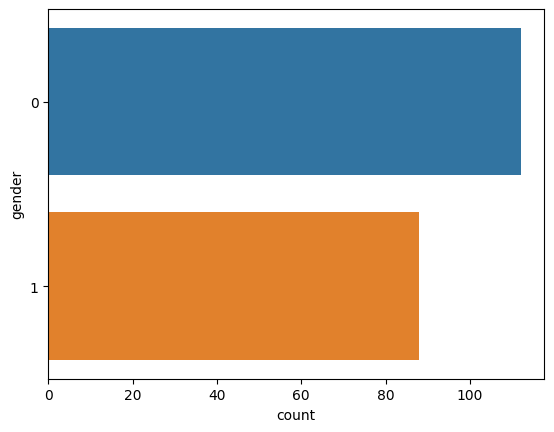

In [86]:
sns.countplot(data=data, y='gender')

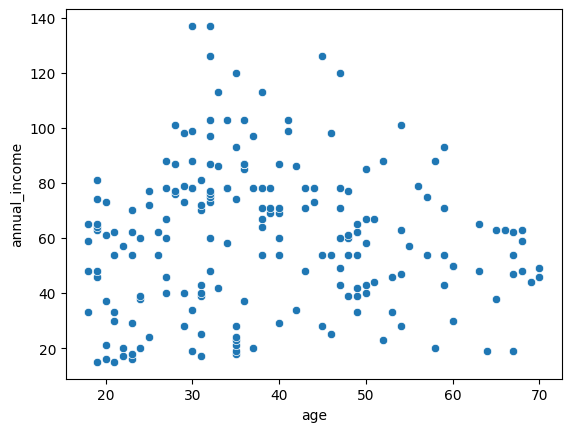

In [58]:
sns.scatterplot(data=data, x="age", y="annual_income")
plt.show()

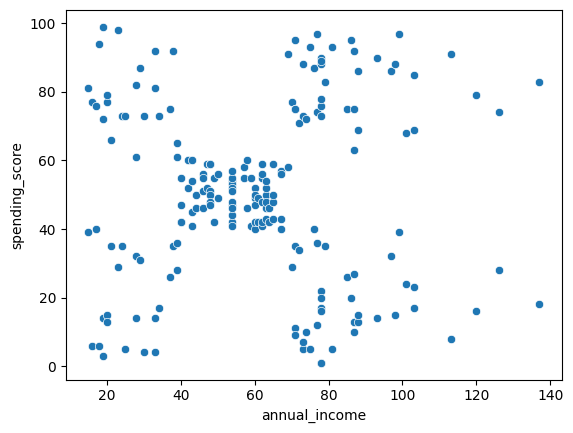

In [59]:
sns.scatterplot(data=data, x="annual_income", y="spending_score")
plt.show()

<a id="multivariate"></a>
**Multivariate**

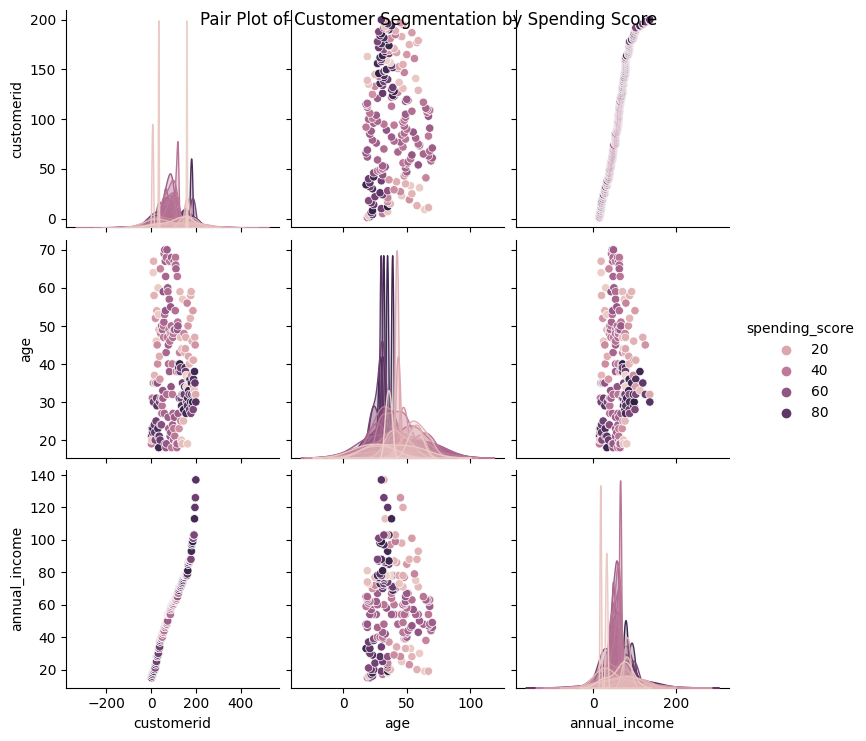

In [66]:
sns.pairplot(data, hue='spending_score', diag_kind='kde').fig.suptitle('Pair Plot of Customer Segmentation by Spending Score')
plt.show()

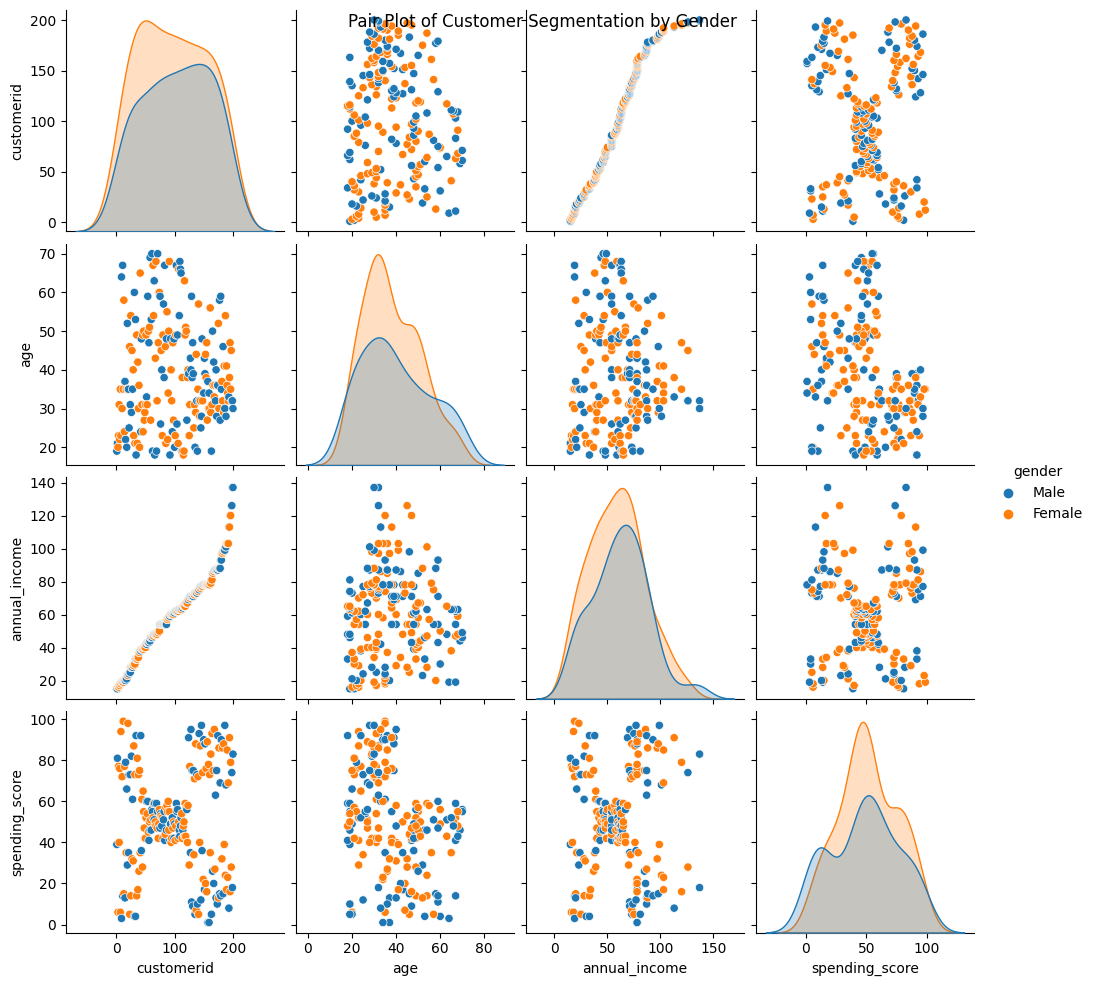

In [67]:
sns.pairplot(data, hue='gender', diag_kind='kde').fig.suptitle('Pair Plot of Customer Segmentation by Gender')
plt.show()

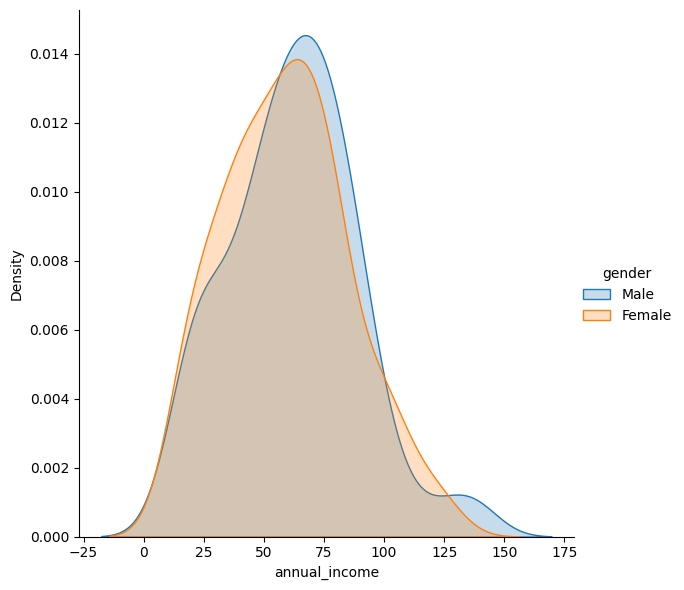

In [68]:
sns.FacetGrid(data, hue="gender", height=6).map(sns.kdeplot, "annual_income", shade=True).add_legend()

In [72]:
data1 = data.drop(['gender', 'customerid'], axis = 1)

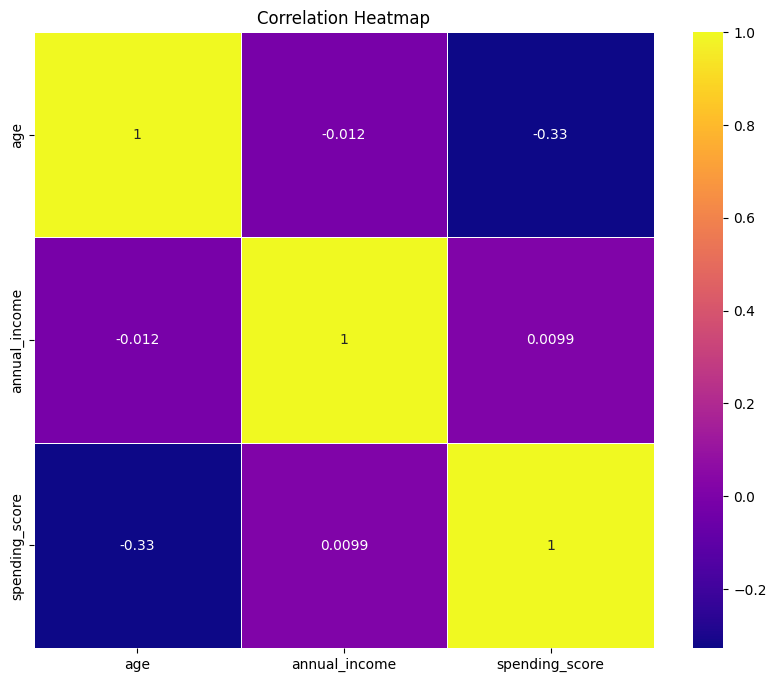

In [74]:
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

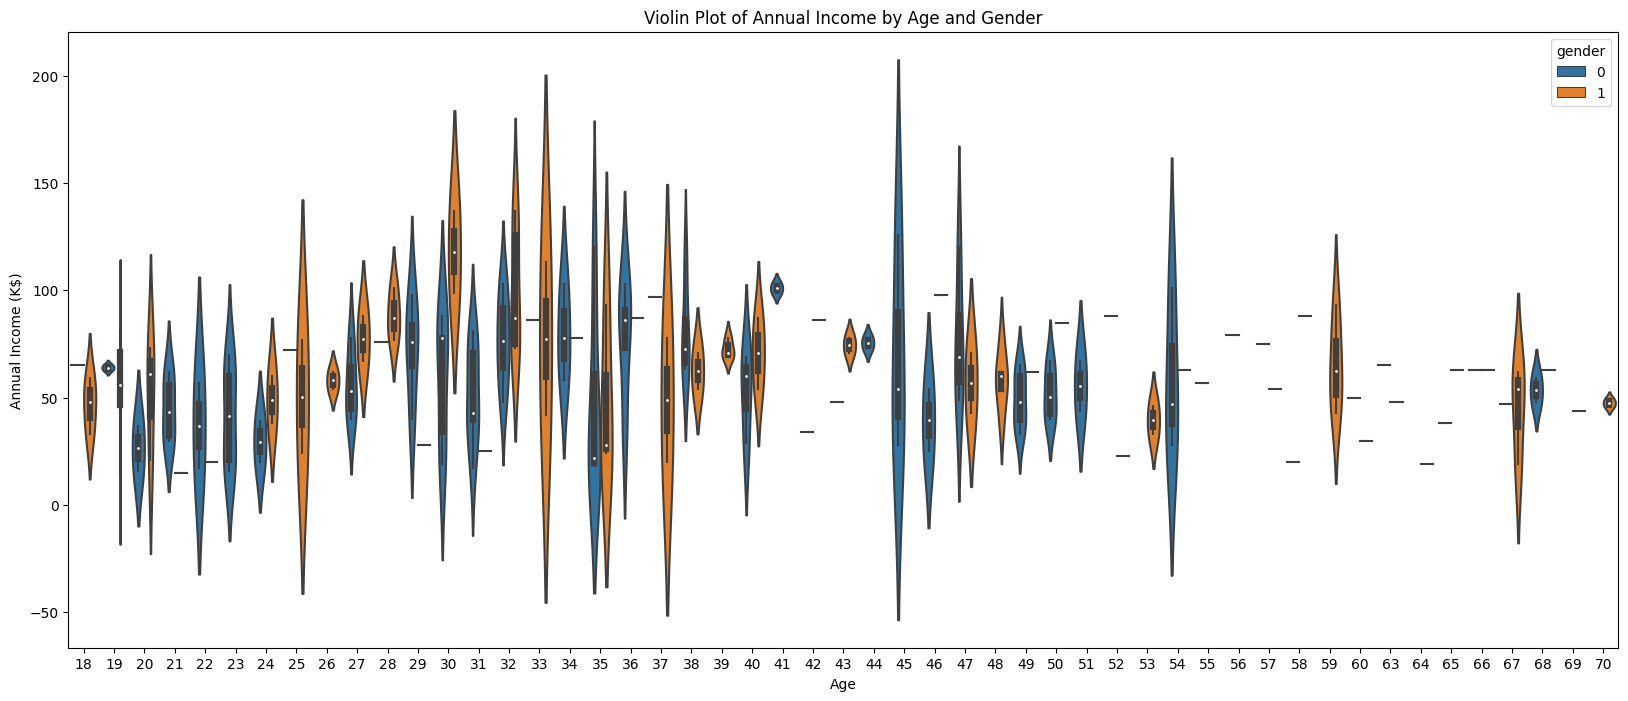

In [173]:
plt.figure(figsize=(20, 8))
sns.violinplot(data=data, x='age', y='annual_income', hue='gender')
plt.title('Violin Plot of Annual Income by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (K$)')
plt.show()

<a id="outliers"></a>
**Finding outliers and replacing them**

In [167]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data1[((data1 >= lower_bound) & (data1 <= upper_bound)).all(axis=1)]

<a id="checking-correlation"></a>
**Checking the correlation of independent variables with the target**

In [168]:
correlation = filtered_data.corr()
target_correlation = correlation['age']
target_correlation

age               1.000000
annual_income     0.004406
spending_score   -0.329421
Name: age, dtype: float64

In [169]:
covariance = filtered_data.cov()
covariance

,age,annual_income,spending_score
age,196.472132,1.558529,-118.884479
annual_income,1.558529,636.919243,6.549608
spending_score,-118.884479,6.549608,662.900092


<a id="checking-categorical"></a>
**Checking for categorical columns and performing encoding**

In [172]:
le = LabelEncoder()

categorical_columns = ['gender']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [85]:
data

,customerid,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


<a id="scaling"></a>
**Standardize the features**

In [140]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

<a id="kmeans"></a>
**KMeans Clustering**

In [157]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

<a id="hierarchical"></a>
**Hierarchical Clustering**

In [159]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(scaled_data)

<a id="dbscan"></a>
**DBSCAN Clustering**

In [164]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_data)

<a id="evaluate"></a>
**Evaluating silhouette score for KMeans, Hierarchical and DBSCAN Clustering**

In [165]:
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
silhouette_agg = silhouette_score(scaled_data, agg_labels)
silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)
print("KMeans score: ", round(silhouette_kmeans*100, 2))
print("Heirarchical score: ", round(silhouette_agg*100, 2))
print("DBSCAN score: ", round(silhouette_dbscan*100, 2))

KMeans score:  40.57
Heirarchical score:  36.91
DBSCAN score:  24.38


<a id="plotting"></a>
**Plotting**

<a id="results"></a>
**Clustering results**

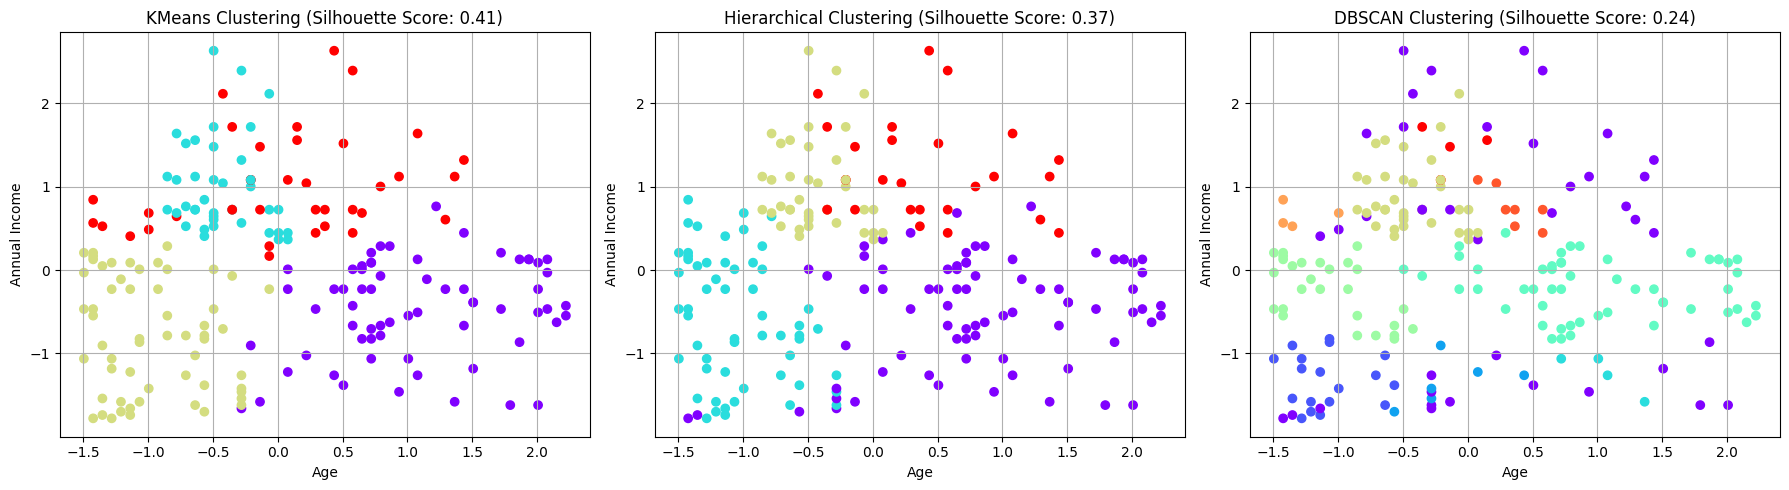

In [166]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='rainbow')
axes[0].set_title(f'KMeans Clustering (Silhouette Score: {silhouette_kmeans:.2f})')
axes[1].scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='rainbow')
axes[1].set_title(f'Hierarchical Clustering (Silhouette Score: {silhouette_agg:.2f})')
axes[2].scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='rainbow')
axes[2].set_title(f'DBSCAN Clustering (Silhouette Score: {silhouette_dbscan:.2f})')

for ax in axes:
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.grid(True)

plt.tight_layout()
plt.show()

<a id="2dplot"></a>
**Number of Clusters vs Inertia for KMeans**

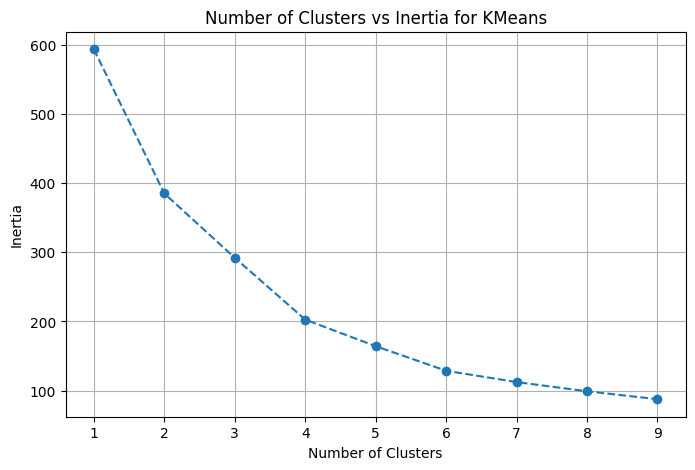

In [163]:
inertia_values = []
possible_k_values = range(1, 10)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(possible_k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs Inertia for KMeans')
plt.grid(True)
plt.show()